# Статистика 1

In [46]:
# Импортируем нужные библиотеки
import pandas as pd
import scipy.stats as ss
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(20,8)}, style = 'whitegrid')

Задание 1. Загрузить данные и убедиться, что всё считалось правильно: посмотреть на столбцы, размер, наличие пропущенных значений (если есть – удалить). Также изучите типы переменных.

In [29]:
games = pd.read_csv('/home/jupyter-a-berezin-18/Statistics/Datasets/games.csv')

### Описание данных  

*games.csv* - набор данных о видеоиграх, объем продаж которых составил более 100 000 копий.  

Имеются следующие поля:  

**Rank** – место по объему продаж  
**Name** – название игры  
**Platform** – платформа, на которой выпущена игра  
**Year** – год релиза  
**Genre** – жанр  
**Publisher** – издатель  
**NA_Sales** – продажи в Северной Америке, в млн.  
**EU_Sales** – продажи в Европе, в млн.  
**JP_Sales** – продажи в Японии, в млн.  
**Other_Sales** – продажи в остальном мире, в млн.  
**Global_Sales** – продажи по всему миру, в млн.  

In [30]:
games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [31]:
games.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [32]:
games.shape

(16598, 11)

In [33]:
# Изучим типы данных
games.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [34]:
# Проверим наличие пропущенных значений
games.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [35]:
# Избавимся от пропущенных значений
games.dropna(inplace = True)

In [36]:
games.shape

(16291, 11)

Определим типы переменных:  

**Rank** – Ранговая/порядковая  
**Name** – Номинативная  
**Platform** – Номинативная  
**Year** – Дискретная  
**Genre** – Номинативная  
**Publisher** – Номинативная  
**NA_Sales** – Непрерывная  
**EU_Sales** – Непрерывная  
**JP_Sales** – Непрерывная  
**Other_Sales** – Непрерывная  
**Global_Sales** – Непрерывная  

Задание 2. Постройте график распределения количества выпущенных игр по годам и выведите описательные характеристики переменной Year.

In [44]:
games.Year = games.Year.astype('int')

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


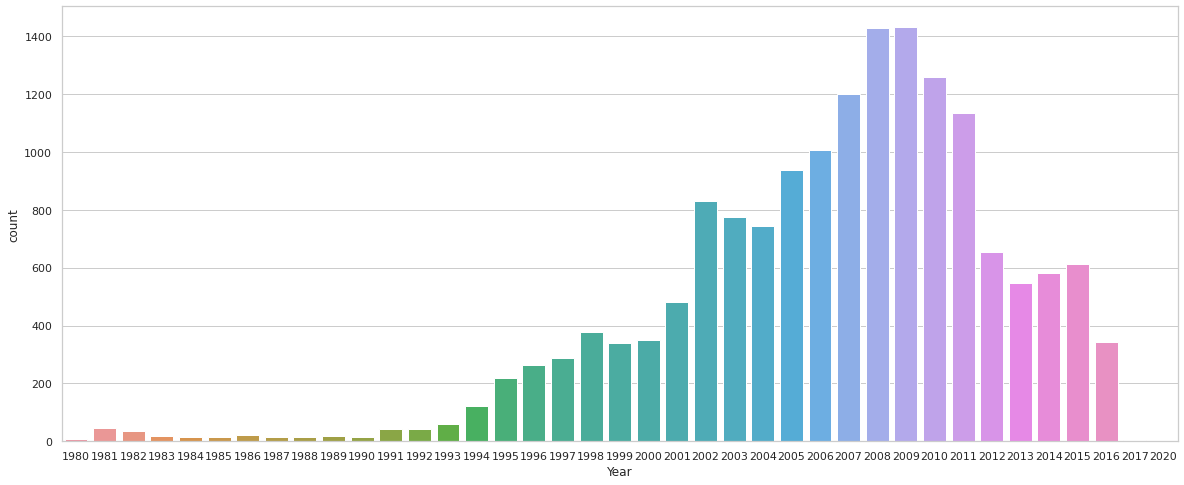

In [47]:
# График распределения выпущенных игр по годам
sns.countplot(games['Year'])

In [16]:
games.Year.describe()

count    16291.000000
mean      2006.405561
std          5.832412
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

In [19]:
ss.mode(games['Year'])

ModeResult(mode=array([2009.]), count=array([1431]))

In [48]:
games.query('Year > 2007').shape[0]/games.shape[0]

0.4906390031305629

 - Медиана равна 2009  
 - Медиана больше чем среднее
 - Примерно половина игр была выпущена после 2007

Задание 3. На каких платформах произошло больше всего релизов? Оставьте названия только тех платформ, частота встречаемости которых составляет более 7%. Значения укажите в порядке убывания частоты встречаемости через запятую с пробелом.

In [50]:
platforms = games.Platform.value_counts(normalize = True).mul(100).to_frame('pct')
platforms.query('pct > 7').index.to_list()

['DS', 'PS2', 'PS3', 'Wii', 'X360', 'PSP', 'PS']

In [53]:
platforms.head(8)

,pct
DS,13.080842
PS2,13.056289
PS3,8.004420
Wii,7.918483
X360,7.574735
PSP,7.347615
PS,7.298508
PC,5.757780


Задание 4. Игры каких издателей (Publisher) встречаются в датасете чаще всего?

In [56]:
# Способ 1
games.Publisher.value_counts().head(10)

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
THQ                              712
Nintendo                         696
Sony Computer Entertainment      682
Sega                             632
Take-Two Interactive             412
Name: Publisher, dtype: int64

In [57]:
# Способ 2
ss.mode(games.Publisher)

ModeResult(mode=array(['Electronic Arts'], dtype=object), count=array([1339]))

Задание 5. В каком регионе медианное значение объема продаж игр Nintendo является наибольшим? (Регионы: NA, EU, JP, Other)

In [59]:
nintendo = games.query('Publisher == "Nintendo"')
(nintendo[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].agg(['mean', 'median']))

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
mean,1.172055,0.601006,0.653721,0.136767,2.563836
median,0.375000,0.120000,0.280000,0.030000,0.920000


 - Северная Америка (NA)

Задание 6. Изучите объемы продаж игр Nintendo в Японии с разбивкой жанрам. Посмотрите на медиану, среднее, межквартильный размах.

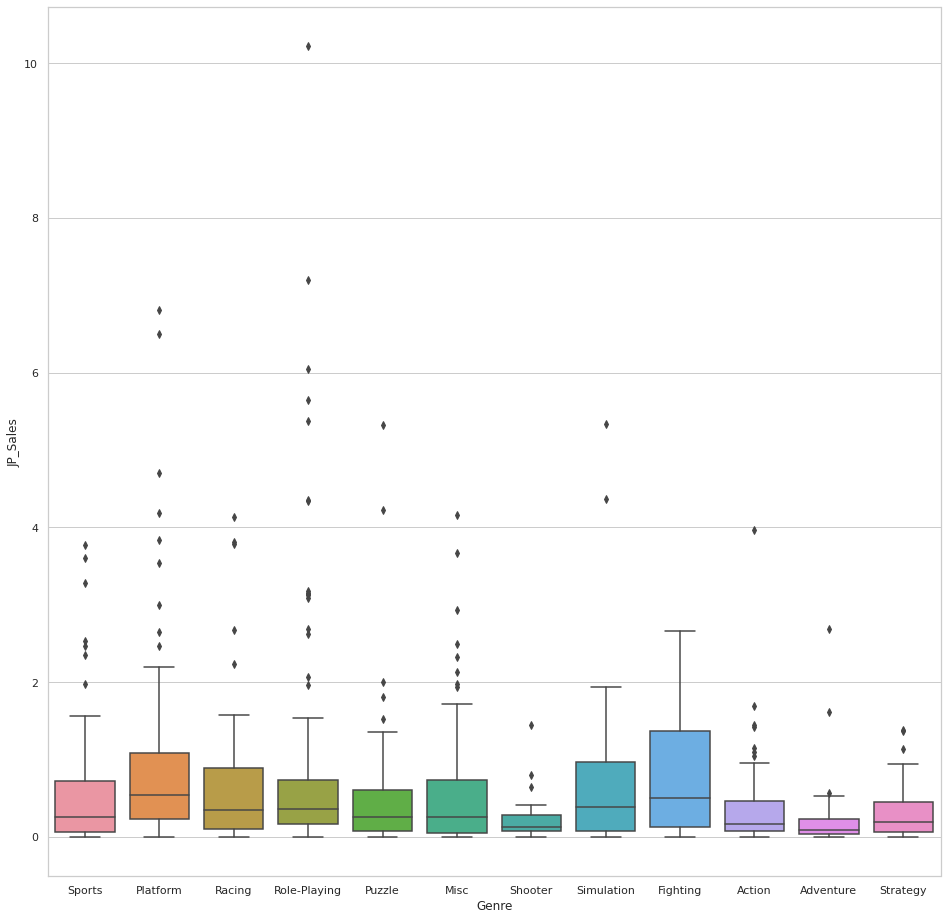

In [63]:
plt.figure(figsize=(16,16))
sns.boxplot(data=games.query('Publisher == "Nintendo"'), x = 'Genre', y = 'JP_Sales')

 - Медианное значение продаж игр жанра Fighting выше, чем у игр Simulation  
 - Межквартильный размах у Strategy меньше, чем у Puzzle  
 - Наибольший межквартильный размах наблюдается у игр жанра Fighting

Задание 7. Визуализируйте динамику изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo следующих жанров: Fighting, Simulation, Platform, Racing, Sports. В какие моменты времени было продано больше всего игр жанра Sports?

In [64]:
df = nintendo \
    .query('Genre in ("Fighting", "Simulation", "Platform", "Racing", "Sports")') \
    .groupby(['Genre', 'Year']).Global_Sales.sum().reset_index()

In [65]:
df

,Genre,Year,Global_Sales
0,Fighting,1987,5.42
1,Fighting,1993,2.00
2,Fighting,1995,3.20
3,Fighting,1996,0.99
4,Fighting,1999,5.55
...,...,...,...
109,Sports,2010,2.18
110,Sports,2012,1.05
111,Sports,2013,1.69
112,Sports,2014,0.88


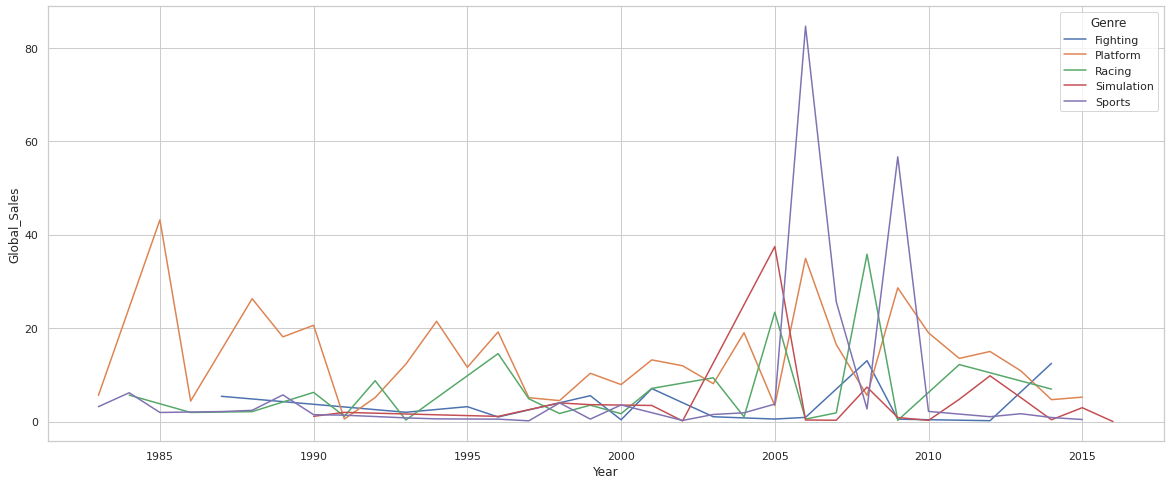

In [66]:
sns.lineplot(x = 'Year', y = 'Global_Sales', hue = 'Genre', data = df)

 - 2005-2010